In [1]:
# Data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Charting
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.svm import SVC


# Project Introduction
This project will follow the following overall plan, and will try to integrate most of the content of the "DTSA 5509 Introduction ot Machine Learning" course:
* supervised learning problem description
* EDA procedure
* analysis (model building and training) and results
* discussion/conclusion. 

# Supervised learning problem description
This dataset, found on Kaggle, provides data that relates a variety of student attributes to their grades.

This project is an example of supervised learning, where there are a number of inputs (features) and one known and correctly labelled output (class or label).

The goal of this project is to try and develop a reliable and accurate ML model to predict or correctly classify student grades based on the most relevant of these features. This goal will be achieved by using both regression and classification ML techniques.

For the regression models, all features and the class will be converted to a numeric format, and all normalised to be in a rangle of 0 to 1. For the classification models, the same numeric feature format will be used, but the class variable will be converted to a binary classification (Pass/Fail).

## Import and inspect the dataset
First up let's import the CSV data into a pandas dataframe, and inspect the dataset.

The initial dataset is 395 rows by 33 columns. From the "non-na" column, I can confrim there are no missing or null values.

In [2]:
# Import CSV datafile into a pandas dataframe
df = pd.read_csv("/kaggle/input/student-performance-data/student_data.csv")

# Print out dataset summary/info 
print("student_data.csv ",df.shape[0], "rows x", df.shape[1], "columns\n")
print ("{:<18} {:<15} {:<10} {}".format( "feature name","type","non-na" ,"unique values" ))
print("-"*60)
for column in df.columns:
    print ("{:<18} {:<15} {:<10} {}".format( column, str(df[column].dtype), df[column].isna().count(),sorted(df[column].unique()) ))

student_data.csv  395 rows x 33 columns

feature name       type            non-na     unique values
------------------------------------------------------------
school             object          395        ['GP', 'MS']
sex                object          395        ['F', 'M']
age                int64           395        [15, 16, 17, 18, 19, 20, 21, 22]
address            object          395        ['R', 'U']
famsize            object          395        ['GT3', 'LE3']
Pstatus            object          395        ['A', 'T']
Medu               int64           395        [0, 1, 2, 3, 4]
Fedu               int64           395        [0, 1, 2, 3, 4]
Mjob               object          395        ['at_home', 'health', 'other', 'services', 'teacher']
Fjob               object          395        ['at_home', 'health', 'other', 'services', 'teacher']
reason             object          395        ['course', 'home', 'other', 'reputation']
guardian           object          395        ['father',

## Feature descriptions
* school : student's school ('GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira )
* sex : student's sex ('F' - female or 'M' - male)
* age : student's age (from 15 to 22)
* address : student's home address type ('U' - urban or 'R' - rural)
* famsize : family size ('LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus : parent's cohabitation status ('T' - living together or 'A' - apart)
* Medu : mother's education (0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary or 4- higher education)
* Fedu : father's education (0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary or 4 - higher education)
* Mjob : mother's job ('teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob : father's job ('teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason : reason to choose this school (close to 'home', school 'reputation', 'course' preference or 'other')
* guardian : student's guardian ('mother', 'father' or 'other')
* traveltime : home to school travel time (1 - < 5 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime : weekly study time (1 - < 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures : number of past class failures ( n if 1<=n < 3, else 4)
* famsup : family educational support ( yes or no)
* paid : extra paid classes within the course subject (Math or Portuguese) ( yes or no)
* activities : extra-curricular activities (yes or no)
* nursery : attended nursery school ( yes or no)
* higher : wants to take higher education ( yes or no)
* internet : Internet access at home ( yes or no)
* romantic : with a romantic relationship ( yes or no)
* famrel : quality of family relationships ( from 1 - very bad to 5 - excellent)
* freetime : free time after school ( from 1 - very low to 5 - very high)
* goout : going out with friends ( from 1 - very low to 5 - very high)
* Dalc : workday alcohol consumption ( from 1 - very low to 5 - very high)
* Walc : weekend alcohol consumption (from 1 - very low to 5 - very high)
* health : current health status (from 1 - very bad to 5 - very good)
* absences : number of school absences (from 0 to 93)
* G1 : first period grade ( from 0 to 20)
* G2 : second period grade ( from 0 to 20)
* G3 : final grade ( from 0 to 20, output target)

# Data cleansing and preparation

While we all agree that most of the fun of these ML projects is developing the models, the reality is that most of the work (usually around 80%) is in the data preparation phase. 

So, fun or not, we now need to carefully go through this dataset feature by feature and make sure it is complete and correct and in a suitable form for ML model use in predicting the students grade.

As the sklearn ML models only handle numbers, part of this phase will be to convert all of the feature data to a corresponding numeric format.

### 2-value text features

These features are encoded with only two text values, so can be converted to numeric fields with values 0 and 1.

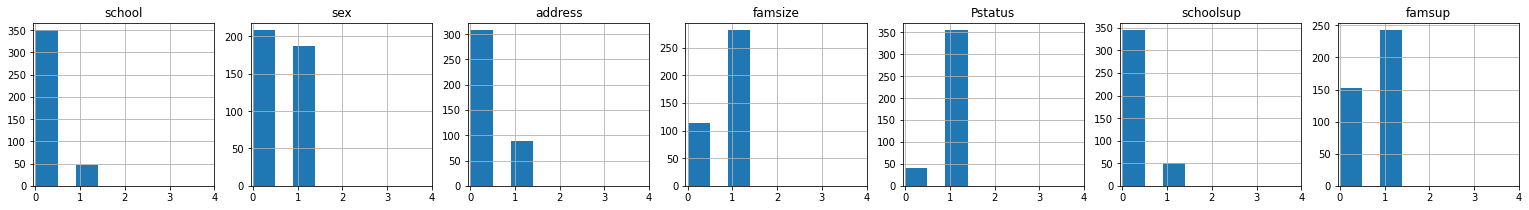

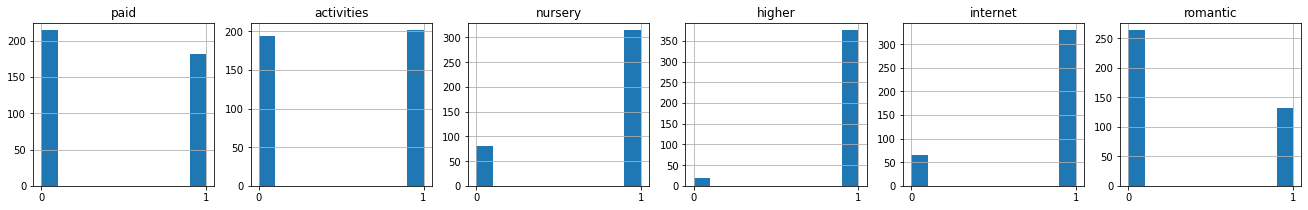

In [3]:
features =['school','sex','address','famsize','Pstatus','schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# Transform text to integer
df['school'] = df['school'].map({'GP':0, 'MS':1}) # Convert school text GP,MS to integer 0,1
df['sex'] = df['sex'].map({'F':0, 'M':1})         # Convert sex text F,M to integer 0,1
df['address'] = df['address'].map({'U':0, 'R':1}) # Convert address text U,R to integer 0,1
df['Pstatus'] = df['Pstatus'].map({'A':0, 'T':1}) # Convert Pstatus text A,T to integer 0,1
df['famsize'] = df['famsize'].map({'LE3':0, 'GT3':1}) # Convert famsize text LE3,GT3 to integer 0,1
df['schoolsup'] = df['schoolsup'].map({'no':0, 'yes':1}) # Convert schoolsup text no,yes to integer 0,1
df['famsup'] = df['famsup'].map({'no':0, 'yes':1}) # Convert famsup text no,yes to integer 0,1
df['paid'] = df['paid'].map({'no':0, 'yes':1}) # Convert paid text no,yes to integer 0,1
df['activities'] = df['activities'].map({'no':0, 'yes':1}) # Convert activities text no,yes to integer 0,1
df['nursery'] = df['nursery'].map({'no':0, 'yes':1}) # Convert nursery text no,yes to integer 0,1
df['higher'] = df['higher'].map({'no':0, 'yes':1}) # Convert higher text no,yes to integer 0,1
df['internet'] = df['internet'].map({'no':0, 'yes':1}) # Convert internet text no,yes to integer 0,1
df['romantic'] = df['romantic'].map({'no':0, 'yes':1}) # Convert romantic text no,yes to integer 0,1

# Plot as simple bar charts
plt.figure(figsize = (50,3))
for i,feature in enumerate(features[:7]):
    ax = plt.subplot(1, len(features), i + 1)
    df[feature].hist(ax=ax, width=0.5)
    ax.set_title(feature)
    plt.xticks(np.arange(0, 5))
plt.show()
plt.figure(figsize = (50,3))
for i,feature in enumerate(features[7:]):
    ax = plt.subplot(1, len(features), i + 1)
    df[feature].hist(ax=ax)
    ax.set_title(feature)
    plt.xticks(np.arange(0, 2))
plt.show()

### Numeric features

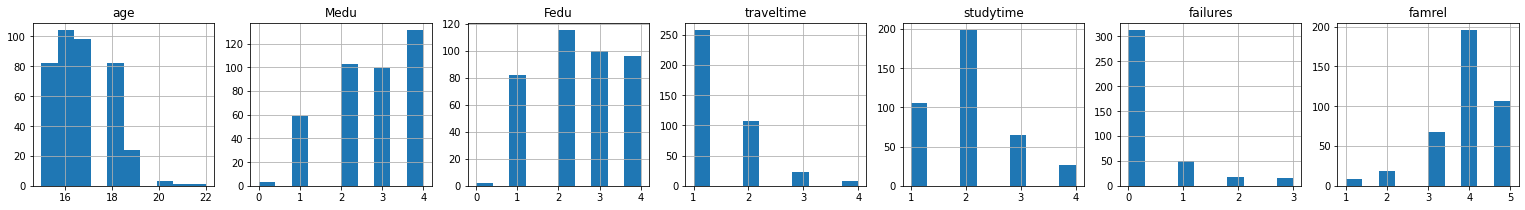

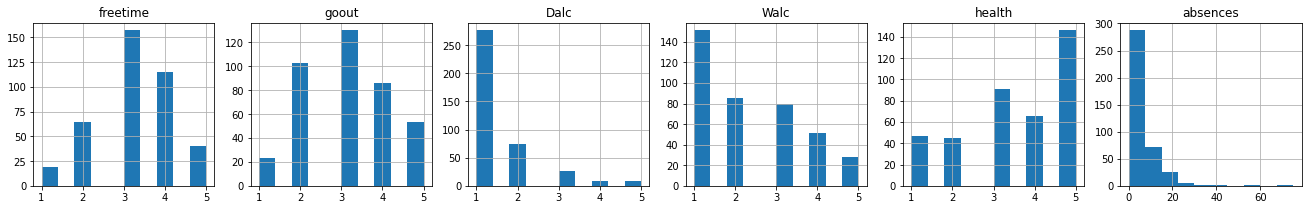

In [4]:
features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

# Plot as simple bar charts
plt.figure(figsize = (50,3))
for i,feature in enumerate(features[:7]):
    ax = plt.subplot(1, len(features), i + 1)
    df[feature].hist(ax=ax)
    ax.set_title(feature)
plt.show()
plt.figure(figsize = (50,3))
for i,feature in enumerate(features[7:]):
    ax = plt.subplot(1, len(features), i + 1)
    df[feature].hist(ax=ax)
    ax.set_title(feature)
plt.show()

### Multi-value categorical features 
These categorical values are not ordinal (ie: there is no notion of "order of importance") so it would be very misleading to convert them to say the digits 1 to 5. Instead, a "one-hot encoding" technique is the best approach. 

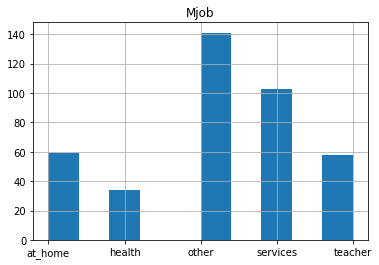

Before one-hot encoding (example):
 0    at_home
1    at_home
2    at_home
3     health
4      other
Name: Mjob, dtype: object
After one-hot encoding (example):
    mjob_at_home  mjob_health  mjob_other  mjob_services  mjob_teacher
0             1            0           0              0             0
1             1            0           0              0             0
2             1            0           0              0             0
3             0            1           0              0             0
4             0            0           1              0             0
------------------------------------------------------------


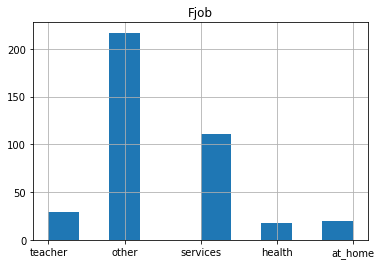

Before one-hot encoding (example):
 0     teacher
1       other
2       other
3    services
4       other
Name: Fjob, dtype: object
After one-hot encoding (example):
    fjob_at_home  fjob_health  fjob_other  fjob_services  fjob_teacher
0             0            0           0              0             1
1             0            0           1              0             0
2             0            0           1              0             0
3             0            0           0              1             0
4             0            0           1              0             0
------------------------------------------------------------


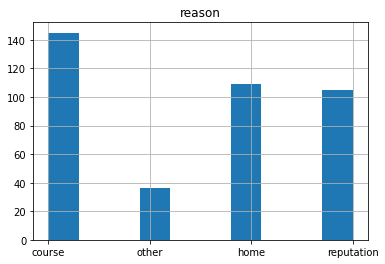

Before one-hot encoding (example):
 0    course
1    course
2     other
3      home
4      home
Name: reason, dtype: object
After one-hot encoding (example):
    reason_course  reason_home  reason_other  reason_reputation
0              1            0             0                  0
1              1            0             0                  0
2              0            0             1                  0
3              0            1             0                  0
4              0            1             0                  0
------------------------------------------------------------


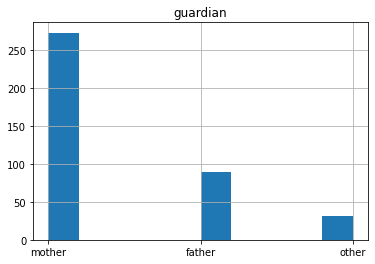

Before one-hot encoding (example):
 0    mother
1    father
2    mother
3    mother
4    father
Name: guardian, dtype: object
After one-hot encoding (example):
    guardian_father  guardian_mother  guardian_other
0                0                1               0
1                1                0               0
2                0                1               0
3                0                1               0
4                1                0               0
------------------------------------------------------------


In [5]:
features =['Mjob','Fjob','reason','guardian']

feature_rename={
    'Mjob':{'at_home':'mjob_at_home', 'health':'mjob_health','other': 'mjob_other','services':'mjob_services', 'teacher': 'mjob_teacher'},
    'Fjob':{'at_home':'fjob_at_home', 'health':'fjob_health','other': 'fjob_other','services': 'fjob_services', 'teacher': 'fjob_teacher'},
    'reason':{'course':'reason_course', 'other':'reason_other','home': 'reason_home','reputation': 'reason_reputation'},
    'guardian':{'mother':'guardian_mother', 'father':'guardian_father','other':'guardian_other'}
}

for feature in features:
    df[feature].hist()
    plt.title(feature)
    plt.show()

    print("Before one-hot encoding (example):\n", df[feature].head())
    onehot= pd.get_dummies(df[feature])
    onehot = onehot.rename(columns=feature_rename[feature])
    print("After one-hot encoding (example):\n",onehot.head())
    df=pd.concat([df, onehot], axis=1)
    df = df.drop(feature, axis=1) # drop column
    print("-"*60)

## Class variable: Gmean
There are three grade columns labelled G1, G2 and G3, which will form the basis of the output class variable.

For all of the ML models we will be using for this assignment, we need to reduce these to a single number.

The planned approach is to see if these three grades are highly correlated, and if so to combime them as a mean of the three.

This approach seems sensible, because a single student will tend to get similarly low or high marks across the board.

Before taking this average, it also seems sensible to remove any rows with zero grades (the student was probably absent) as these zero values should not be part of the ML training data and will only skew the model training process. 

If the number of zero-grade rows does not exceed 10% of the total row count, these rows can be simply removed.

If there is a larger number of zero-grade rows, I would suggest interpolating the missing grade data using KNN.

          G1        G2        G3
G1  1.000000  0.901940  0.891805
G2  0.901940  1.000000  0.965583
G3  0.891805  0.965583  1.000000


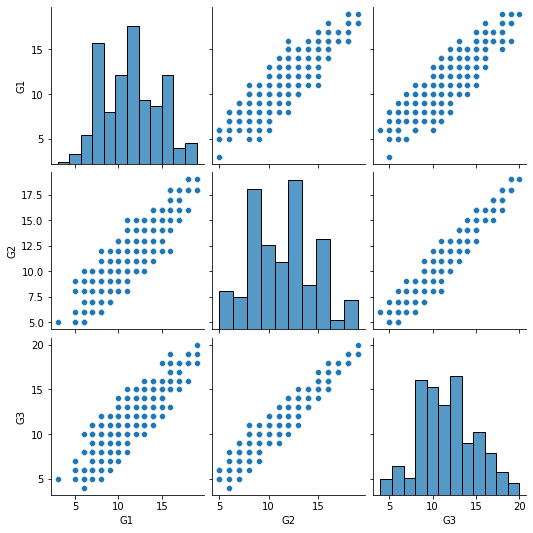

In [6]:
# Data cleansing of class variable G (grade)

#Are there any missing, wrong or outlier values?
# Remove rows with zero grades because these rows will skew the model as they are most likely students who did not complete the year 
# and therefore are not representative of the student population we are trying to model.
df= df[df["G1"]>0]
df= df[df["G2"]>0]
df= df[df["G3"]>0]

# Are G1, G2 and/or G3 correlated?

#From the pairplots below it is visually clear that G1, G2 and G3 are very highly correlated
sns.pairplot(df[['G1','G2','G3']])

#This observation is quantified by the correlation matrix
print(df[['G1','G2','G3']].corr())

#Because G1, G2 and G3 are highly correlated, lets combine into one new column Gmean and use this as the class variable
df['Gmean'] = df[['G1','G2','G3']].mean(axis=1)
df= df.drop(['G1','G2','G3'], axis=1)

## Data normalisation

The last step is to normalise all of the values to a range of 0-1, otherwise features like Age (range 15-19) will have model coefficients that do not match the scale of say Medu (range 1-4) or Gmean (range 0-20)

The easiest solution is to rescale the entire datatset to use a 0-1 range across all features.

In [7]:
columns=df.columns
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns = columns)

# Print out dataset summary/info 
print ("{:<18} {:<15} {:<10} {}".format( "feature name","type","non-na" ,"unique values" ))
print("-"*60)
for column in df.columns:
    unique=list(df[column].unique()) 
    print ("{:<18} {:<15} {:<10} {}".format( column, str(df[column].dtype), df[column].isna().count(), ['%5.2f' % val for val in unique]))

feature name       type            non-na     unique values
------------------------------------------------------------
school             float64         357        [' 0.00', ' 1.00']
sex                float64         357        [' 0.00', ' 1.00']
age                float64         357        [' 0.43', ' 0.29', ' 0.00', ' 0.14', ' 0.57', ' 1.00', ' 0.71', ' 0.86']
address            float64         357        [' 0.00', ' 1.00']
famsize            float64         357        [' 1.00', ' 0.00']
Pstatus            float64         357        [' 0.00', ' 1.00']
Medu               float64         357        [' 1.00', ' 0.25', ' 0.75', ' 0.50', ' 0.00']
Fedu               float64         357        [' 1.00', ' 0.25', ' 0.50', ' 0.75', ' 0.00']
traveltime         float64         357        [' 0.33', ' 0.00', ' 0.67', ' 1.00']
studytime          float64         357        [' 0.33', ' 0.67', ' 0.00', ' 1.00']
failures           float64         357        [' 0.00', ' 1.00', ' 0.67', ' 0.33']
sc

## Feature reduction
Lets check that there arent any sets of features that are highly correlated with each other, as these can skew some ML models. If say two features are highly correlated, then it is best to simply delete one of them.

Text(0.5, 1.0, 'Feature Correlation heatmap')

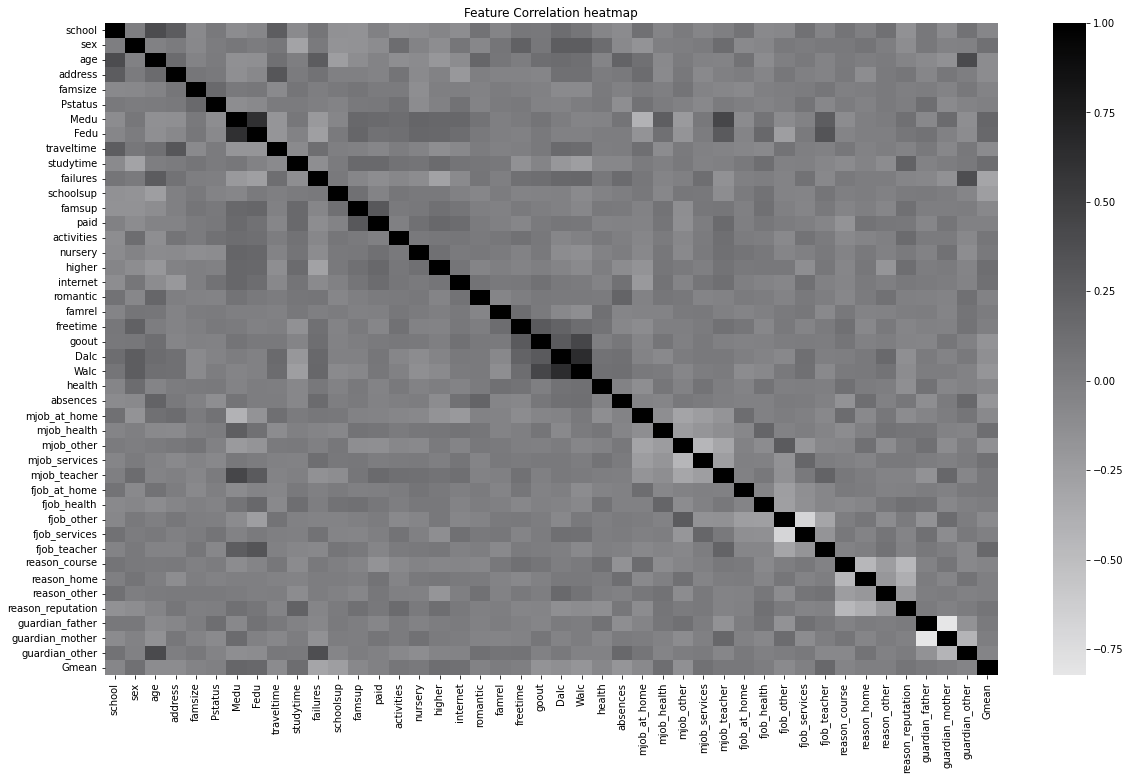

In [8]:
corr=df.corr()
plt.figure(figsize = (20,12))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True) # Grey scale
sns.heatmap(corr, cmap=cmap)
plt.title("Feature Correlation heatmap")

Looking for dark patches on the correlation heatmap above, there are surprisingly few darker spots, suggesting that the features are all not particularly related to each other. The possible exceptions may be the pairings of "Medu, Fedu" and "Walc, Dalc" 

In [9]:
print('Correlation between Medu and Fedu: ',df['Medu'].corr(df['Fedu']))
print('Correlation between Walc and Dalc: ',df['Walc'].corr(df['Dalc']))

Correlation between Medu and Fedu:  0.6083268039248207
Correlation between Walc and Dalc:  0.644919527676651


These correaltion values are not sufficiently high to warrant removing one of each of these features.

However, as an overall observation it is a bit worrying that there appears to be so little correlation between the class variable Gmean and all of the other features! This would suggest an early warning that simple models such as Linear Regression are not going to work very well at all.

# Complete data preparation function

In [10]:
def ImportandCleanData():
    # Import CSV datafile into a pandas dataframe
    df = pd.read_csv("/kaggle/input/student-performance-data/student_data.csv")
    # Transform text to integer
    df['school'] = df['school'].map({'GP':0, 'MS':1}) # Convert school text GP,MS to integer 0,1
    df['sex'] = df['sex'].map({'F':0, 'M':1})         # Convert sex text F,M to integer 0,1
    df['address'] = df['address'].map({'U':0, 'R':1}) # Convert address text U,R to integer 0,1
    df['Pstatus'] = df['Pstatus'].map({'A':0, 'T':1}) # Convert Pstatus text A,T to integer 0,1
    df['famsize'] = df['famsize'].map({'LE3':0, 'GT3':1}) # Convert famsize text LE3,GT3 to integer 0,1
    df['schoolsup'] = df['schoolsup'].map({'no':0, 'yes':1}) # Convert schoolsup text no,yes to integer 0,1
    df['famsup'] = df['famsup'].map({'no':0, 'yes':1}) # Convert famsup text no,yes to integer 0,1
    df['paid'] = df['paid'].map({'no':0, 'yes':1}) # Convert paid text no,yes to integer 0,1
    df['activities'] = df['activities'].map({'no':0, 'yes':1}) # Convert activities text no,yes to integer 0,1
    df['nursery'] = df['nursery'].map({'no':0, 'yes':1}) # Convert nursery text no,yes to integer 0,1
    df['higher'] = df['higher'].map({'no':0, 'yes':1}) # Convert higher text no,yes to integer 0,1
    df['internet'] = df['internet'].map({'no':0, 'yes':1}) # Convert internet text no,yes to integer 0,1
    df['romantic'] = df['romantic'].map({'no':0, 'yes':1}) # Convert romantic text no,yes to integer 0,1
    # On-hot encoding
    features =['Mjob','Fjob','reason','guardian']
    feature_rename={
        'Mjob':{'at_home':'mjob_at_home', 'health':'mjob_health','other': 'mjob_other','services':'mjob_services', 'teacher': 'mjob_teacher'},
        'Fjob':{'at_home':'fjob_at_home', 'health':'fjob_health','other': 'fjob_other','services': 'fjob_services', 'teacher': 'fjob_teacher'},
        'reason':{'course':'reason_course', 'other':'reason_other','home': 'reason_home','reputation': 'reason_reputation'},
        'guardian':{'mother':'guardian_mother', 'father':'guardian_father','other':'guardian_other'}
    }
    for feature in features:
        onehot= pd.get_dummies(df[feature])
        onehot = onehot.rename(columns=feature_rename[feature])
        df=pd.concat([df, onehot], axis=1)
        df = df.drop(feature, axis=1) # drop column
    # Data cleansing of class variable G (grade)
    df= df[df["G1"]>0]
    df= df[df["G2"]>0]
    df= df[df["G3"]>0]
    #Because G1, G2 and G3 are highly correlated, lets combine into one new column Gmean and use this as the class variable
    df['Gmean'] = df[['G1','G2','G3']].mean(axis=1)
    df= df.drop(['G1','G2','G3'], axis=1)
    #Normalisation (0-1)
    columns=df.columns
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled,columns = columns)
    #Function outputs
    X=df.loc[:, df.columns != 'Gmean']  # All columns except GMean
    y=df['Gmean'] # Gmean
    features=list(df.columns)[:-1] # all except Gmean
    return X,y,features

# Linear Regression Model

Lets make an first attempt at modelling Gmean by assuming there is a linear equation that relates all of the features to the output Gmean. This is almost certainly a wrong assumption because almost no data collected from real-world contains linear relations but nonetheless is a good place to start.

## Linear Regression: sklearn 
For this first modelling attempt, let's use the standard sklearn.linear_model "LinearRegression"

(357, 43)
R-squared:  0.1689998050242465


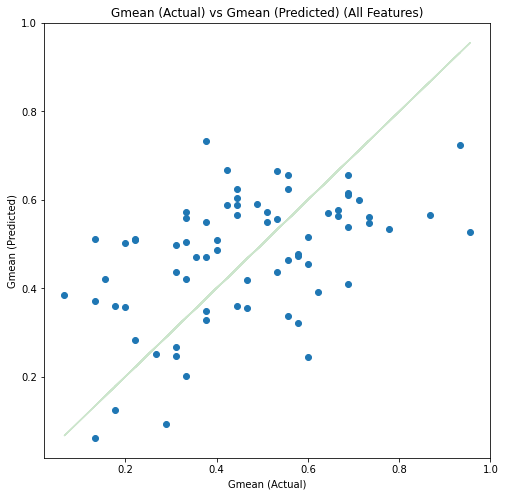

In [11]:
X,y,features = ImportandCleanData()
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

reg = LinearRegression().fit(X_train, y_train)
y_pred=reg.predict(X_test)

print("R-squared: ",reg.score(X_test, y_test))

plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test,  'g-', alpha=0.2)
plt.xlabel("Gmean (Actual)")
plt.ylabel("Gmean (Predicted)")
plt.title("Gmean (Actual) vs Gmean (Predicted) (All Features)")
plt.show()


As expected, the R-squared result is **very low** (less than 0.2) and the scatter plot of Gmean Actual versus Gmean Predicted is not even remotely close to forming a straight line! 

Clearly, whatever final ML model is discovered, it's going to have to be lot better than this!

Before giving up on the Linear Regression approach, its worth trying some simpler Linear models with fewer features.  One method of acheiving this, called "Forward Stepwise Refinement",  is to loop through all of the features and find the feature that yeilds the largest R-squared. Add this feature to the model, then repeat, until all of the features have finally been included. 

Optimal number of features:  20
Maximum R-squared:  0.3899658322936006
Optimal features:  ['failures', 'mjob_other', 'goout', 'schoolsup', 'fjob_teacher', 'absences', 'mjob_health', 'school', 'paid', 'Medu', 'fjob_at_home', 'sex', 'reason_reputation', 'address', 'studytime', 'guardian_mother', 'freetime', 'age', 'reason_other', 'fjob_other']


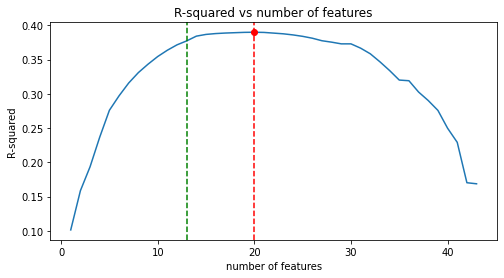

In [12]:
# Forward Stepwise Refinement
X,y,features = ImportandCleanData()
model_features=[]
results=[]

while len(features)>0:
    r_squared_max=0
    r_squared_max_feature=""
    for feature in features:
        X_=X[model_features + [feature]]
        X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42) # 80% train, 20% test
        reg = LinearRegression().fit(X_train, y_train)
        y_pred=reg.predict(X_test)
        r_squared = reg.score(X_test, y_test)
        if r_squared>r_squared_max:
            r_squared_max=r_squared
            r_squared_max_feature=feature # store feature with largets R-squared for this loop iteration

    #print(len(model_features + [r_squared_max_feature]),r_squared_max,model_features + [r_squared_max_feature])
    results.append([len(model_features + [r_squared_max_feature]),r_squared_max,model_features + [r_squared_max_feature]])
    model_features.append(r_squared_max_feature)
    features.remove(r_squared_max_feature)

numberoffeatures=np.array([item[0] for item in results],dtype=object)
numberoffeaturesrsquared=np.array([item[1] for item in results],dtype=object)
rsquaredfeatures=np.array([item[2] for item in results],dtype=object)

plt.figure(figsize = (8,4))
plt.plot(numberoffeatures,numberoffeaturesrsquared)
plt.title('R-squared vs number of features')
plt.xlabel("number of features")
plt.ylabel("R-squared")

indexmaxrsquared=np.argmax(numberoffeaturesrsquared, axis=0)
print("Optimal number of features: ", numberoffeatures[indexmaxrsquared])
print("Maximum R-squared: ", numberoffeaturesrsquared[indexmaxrsquared])
print("Optimal features: ", rsquaredfeatures[indexmaxrsquared])

plt.plot(numberoffeatures[indexmaxrsquared],numberoffeaturesrsquared[indexmaxrsquared], color='red', marker='o' )
plt.axvline(x=numberoffeatures[indexmaxrsquared], color='red', linestyle="dashed")

# Practical number of features
plt.axvline(x=13, color='green', linestyle="dashed")

plt.show()

From the chart above, the maximum R-squared is obtained with 20 features. However, the model may be simplified down to 13 features with almost no loss of R-squared (indicated by the green vertical line on the chart)

R-squared:  0.3842639206075755


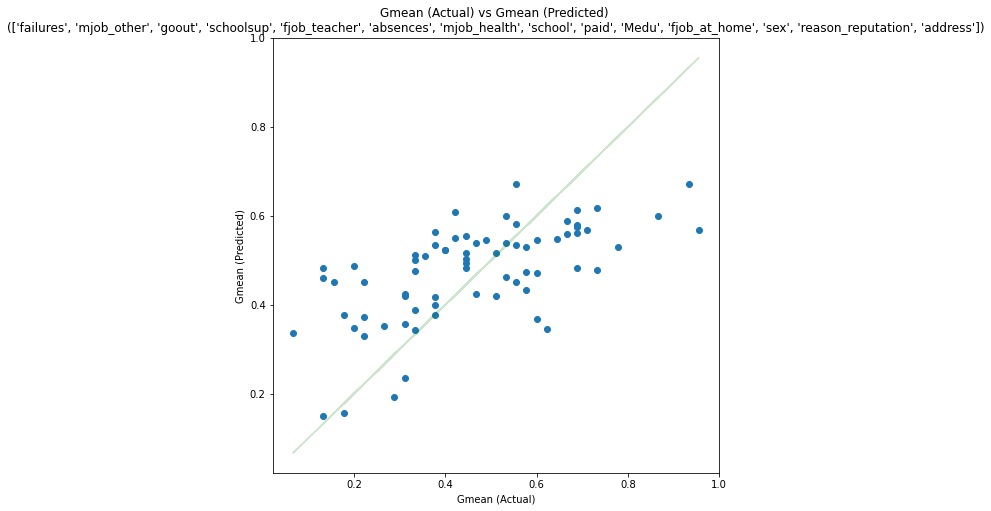

In [13]:
X,y,features = ImportandCleanData()
X=X[rsquaredfeatures[13]] # First 13 features giving max R-squared

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred=reg.predict(X_test)

print("R-squared: ",reg.score(X_test, y_test))
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred)

plt.plot(y_test, y_test, 'g-', alpha=0.2)
plt.xlabel("Gmean (Actual)")
plt.ylabel("Gmean (Predicted)")
plt.title("Gmean (Actual) vs Gmean (Predicted) \n(" + str(rsquaredfeatures[13]) + ")")
plt.show()

From the graph above, there are clearly a small number of outliers on the far left and far right of the green target line, so it would now be reasonable to remove these outliers from the dataset. For this approach, it is easier to use the statsmodels linear regression ols module, as this autimatically calculates the leverage and thus easily identifies outliers or unusual points.

## Linear Regression: statsmodels
statsmodels is another popular python ML library, offering a simpler interface than sklearn and several built-in "high level" outputs such as the summary results table and the leverage chart.

In [14]:
X,y,features = ImportandCleanData()

features= "+".join(rsquaredfeatures[13])
print("Regression formula: Gmean ~ ",features)
res = smf.ols('Gmean ~ '+ features, data=pd.concat([X,y], axis=1)).fit()
print(res.summary())

Regression formula: Gmean ~  failures+mjob_other+goout+schoolsup+fjob_teacher+absences+mjob_health+school+paid+Medu+fjob_at_home+sex+reason_reputation+address
                            OLS Regression Results                            
Dep. Variable:                  Gmean   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.926
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           1.18e-16
Time:                        20:18:49   Log-Likelihood:                 110.33
No. Observations:                 357   AIC:                            -190.7
Df Residuals:                     342   BIC:                            -132.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t 

The above summary table is interesting in that it identifies many of the 13 features chosen from previous steps to not be significant (p>0.05), therefore it will be interesting to remove these features and see how the R-squared result compares

In [15]:
# Get list of features where P>|t|<0.005
# I couldnt find a built-in way to get this, so did it via text parsing the summary output
a=str(res.summary())
cc=a[a.find("Intercept"):a.find("Omnibus")].split("\n")[:-2]
dd=[]
for cc_ in cc:
    cc_=cc_.split(" ")
    cc_ = [ele for ele in cc_ if ele.strip()]
    dd.append(cc_)
features=[]
for dd_ in dd:
    if float(dd_[4])<0.005:
        features.append(dd_[0])
features= "+".join(features[1:])
print(features)

failures+goout+schoolsup+fjob_teacher


In [16]:
print("Regression formula: Gmean ~ ",features)
res = smf.ols('Gmean ~ '+ features, data=pd.concat([X,y], axis=1)).fit()
print(res.summary())

Regression formula: Gmean ~  failures+goout+schoolsup+fjob_teacher
                            OLS Regression Results                            
Dep. Variable:                  Gmean   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     21.72
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           4.93e-16
Time:                        20:18:49   Log-Likelihood:                 94.120
No. Observations:                 357   AIC:                            -178.2
Df Residuals:                     352   BIC:                            -158.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

Finally, lets identify and remove any outlier rows in the data using the built-in statsmodels leverage chart.

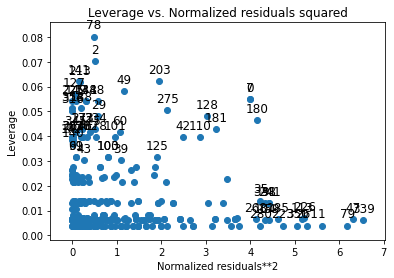

<Figure size 576x576 with 0 Axes>

In [17]:
sm.graphics.plot_leverage_resid2(res)
plt.figure(figsize = (8,8))
plt.show()

Now lets remove the obvious outliers or unusual rows from the dataset

In [18]:
print("Regression formula: Gmean ~ ",features)
X=X.drop(X.index[[251, 74, 180]])
y=y.drop(y.index[[251, 74, 180]])
res = smf.ols('Gmean ~ '+ features, data=pd.concat([X,y], axis=1)).fit()
#print(res.summary())
print("R-squared = ", res.rsquared)

Regression formula: Gmean ~  failures+goout+schoolsup+fjob_teacher
R-squared =  0.20092546399986544


## Linear Regression Summary

Its pretty obvious that no amount of pushing and prodding this dataste is going to result in a satisfactory Linear Regression model. The simple reason for this is that clearly no linear relationship exists in the data between the features and the class Gmean. This is not surprising at all, as this is the case for almost every "real-world" dataset, however it is still interesting to start with a simple linear model to get a feel for the dataset.

# Logistic Regression Model
The logistic regression model is very similar to the regression performed in the prior step, but instead of preicting a continous numeric output, it simply tries to classify the output as one of two states. In this example, the Gmean class is converted to boolean where if<=0.5 set to False, >0.5 set to True.

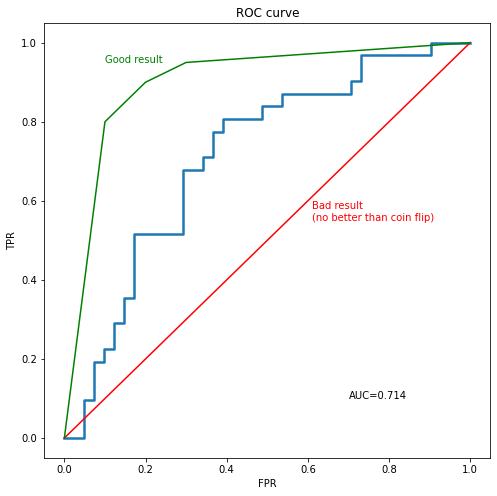

In [19]:
X,y,features = ImportandCleanData()
y=y>0.5 # Gmean, converted to a boolean

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
LogReg = LogisticRegression(random_state=42).fit(X_train, y_train)

y_pred=LogReg.predict(X_test) # Predict class fail/pass
y_preda=LogReg.predict_proba(X_test) # Predict probability of class=pass

fpr, tpr, thresholds = roc_curve(y_test, y_preda[:,1])
auc=roc_auc_score(y_test, y_preda[:,1])

plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, linewidth=2.5)
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.text(0.7,0.1,"AUC="+"{:.3f}".format(auc))

plt.plot([0,1],[0,1],color="r") # 45 degree line indicating result given by random chance (eg: flipping a coin)
plt.text(0.61,0.55,"Bad result\n(no better than coin flip)", color="r")

plt.plot([0,0.1,0.2,0.3,1],[0,0.8,0.9,0.95,1], color="g") # example of a good ROC result
plt.text(0.1,0.95,"Good result", color="g")
plt.show()


The ROC graph above is not a very convincing result for the logistic regression, which is not surprising as it attempting to separate the data with a linear hyperplane, and we have already seem from the dismal performance of the linear regression that such a linear hyperplane does not exist in this dataset.

# Decision Tree Regressor Model
Like the linear regression above, the decision tree model tries to make a numeric prediction of the class output (Gmean). However, instead of trying to fit a linear equation, it simply tries to progressively split the rows into successively small "clumps" until it reaches a leaf node with a predicted class value.

The code below trains the decision tree regressor model for several values of max_depth, and displays the resulting number of leaves and R-squared value.

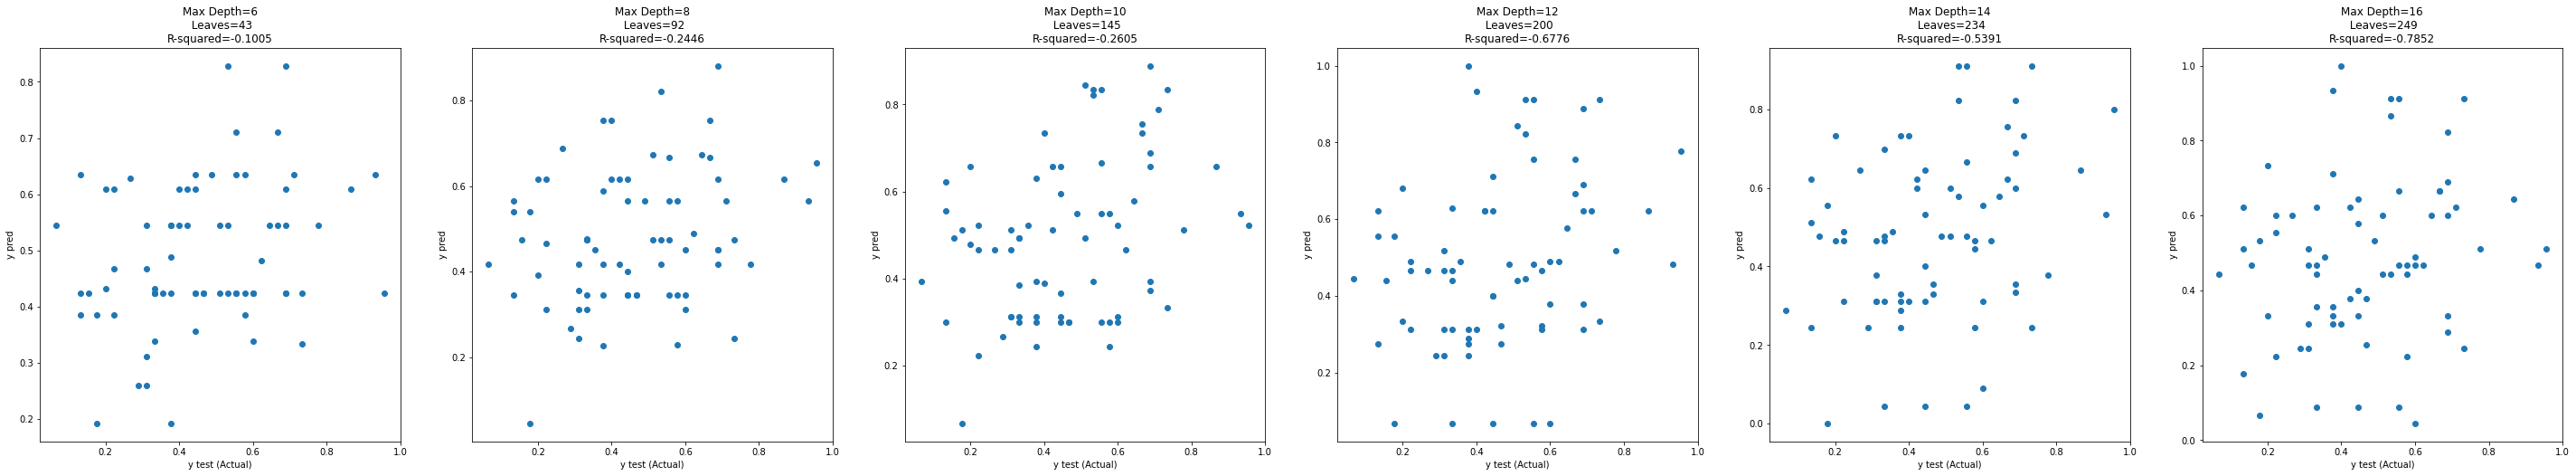

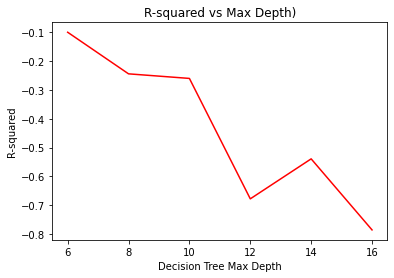

In [20]:
resultsmodel=[] # used for Rsquared vs max_depth graph
X,y,features = ImportandCleanData() # 357 rows
#print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training, 20% testing

plt.figure(figsize = (50,8))
for i,maxdepth in enumerate(range(6,17,2)):
    model = tree.DecisionTreeRegressor(max_depth=maxdepth).fit(X_train, y_train)
    #model = tree.DecisionTreeRegressor(max_depth=maxdepth).fit(X, y)
    y_pred=model.predict(X_test)
    Rsquared=model.score(X_test, y_test) 
    leaves=model.get_n_leaves()
    resultsmodel.append([maxdepth, Rsquared, leaves, leaves/len(X)])
    
    plt.subplot(1, 6, i + 1)
    plt.title("Max Depth="+ str(maxdepth)+ "\n Leaves="+ str(leaves)+"\nR-squared="+str(round(Rsquared,4)))   
    plt.xlabel("y test (Actual)")
    plt.ylabel("y pred")
    plt.scatter(y_test.values, y_pred)
plt.show()

plt.plot(np.array(resultsmodel).T[0],np.array(resultsmodel).T[1], "r")
plt.title("R-squared vs Max Depth)")
plt.xlabel("Decision Tree Max Depth")
plt.ylabel("R-squared")
plt.show()

The above results are beyond terrible, and all of the R-squared values are actually negative! This means that the decision tree model is actually performing worse than a simple horizontal line (ie: the prediction is a constant). The most probable explanation for this result is that the data is so un-correlated with the class that, similar to the linear regression, there is no pattern to be found. 
This theory is backed up by the following test, where I train the model with ALL of the data. This produces a totally over-fitted model that will virtually exactly macth the supplied data as shown below:

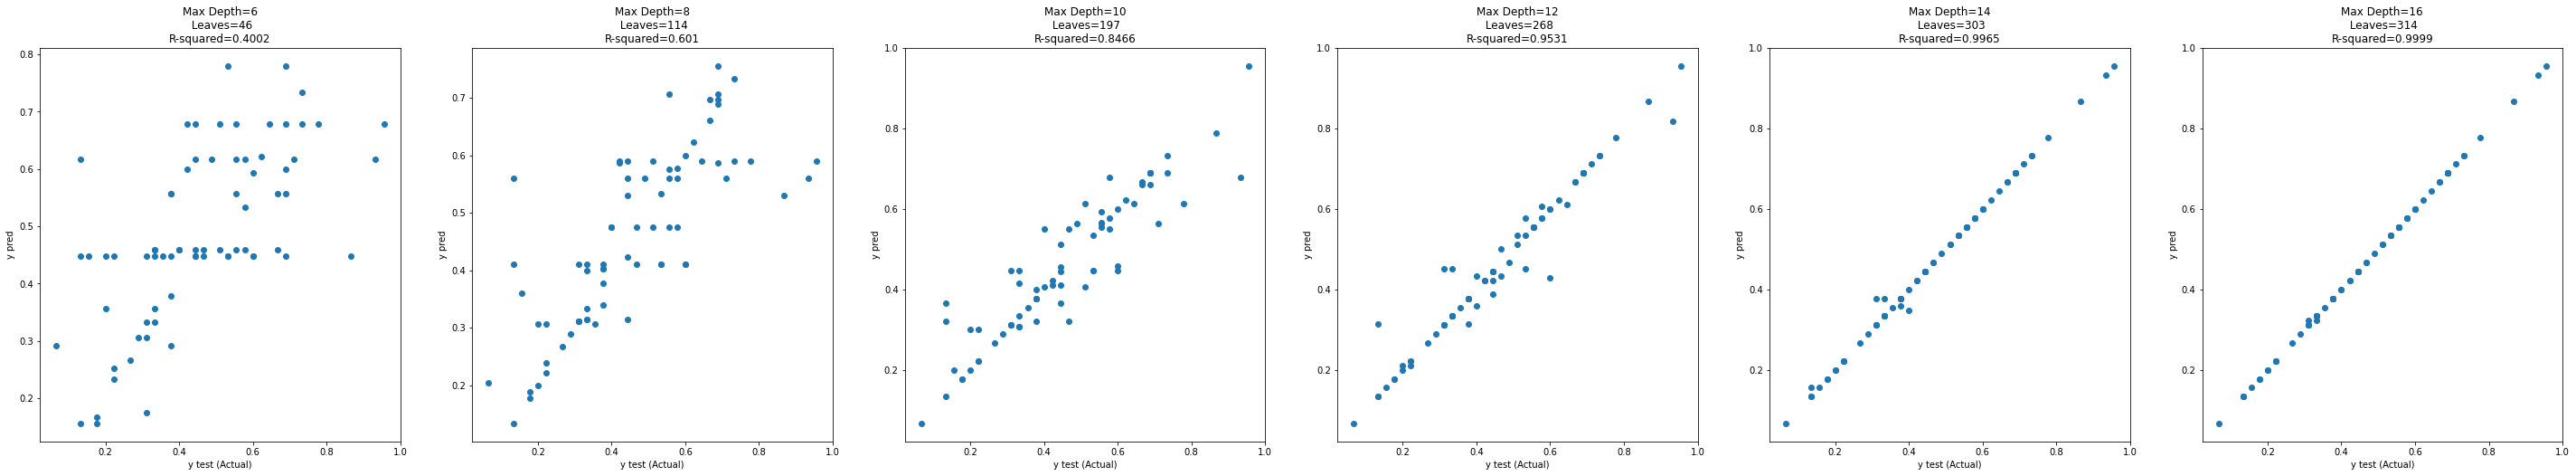

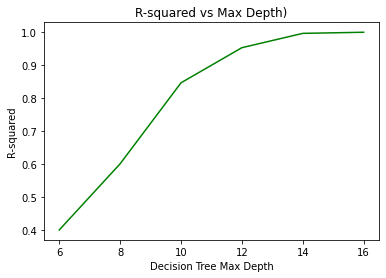

In [21]:
resultsmodel=[] # used for Rsquared vs max_depth graph
X,y,features = ImportandCleanData() # 357 rows
#print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training, 20% testing

plt.figure(figsize = (50,8))
for i,maxdepth in enumerate(range(6,17,2)):
    #model = tree.DecisionTreeRegressor(max_depth=maxdepth).fit(X_train, y_train)
    model = tree.DecisionTreeRegressor(max_depth=maxdepth).fit(X, y) # <=== Train on ALL dataa!
    y_pred=model.predict(X_test)
    Rsquared=model.score(X_test, y_test) 
    leaves=model.get_n_leaves()
    resultsmodel.append([maxdepth, Rsquared, leaves, leaves/len(X)])
    
    plt.subplot(1, 6, i + 1)
    plt.title("Max Depth="+ str(maxdepth)+ "\n Leaves="+ str(leaves)+"\nR-squared="+str(round(Rsquared,4)))   
    plt.xlabel("y test (Actual)")
    plt.ylabel("y pred")
    plt.scatter(y_test.values, y_pred)
plt.show()

plt.plot(np.array(resultsmodel).T[0],np.array(resultsmodel).T[1], "g")
plt.title("R-squared vs Max Depth)")
plt.xlabel("Decision Tree Max Depth")
plt.ylabel("R-squared")
plt.show()

The simplified decision tree with max_depth=4 (shown below) visually shows the disparate nature of the dataset, as the darker nodes are not grouped together in any apttern but appear almost randomly all over the tree.

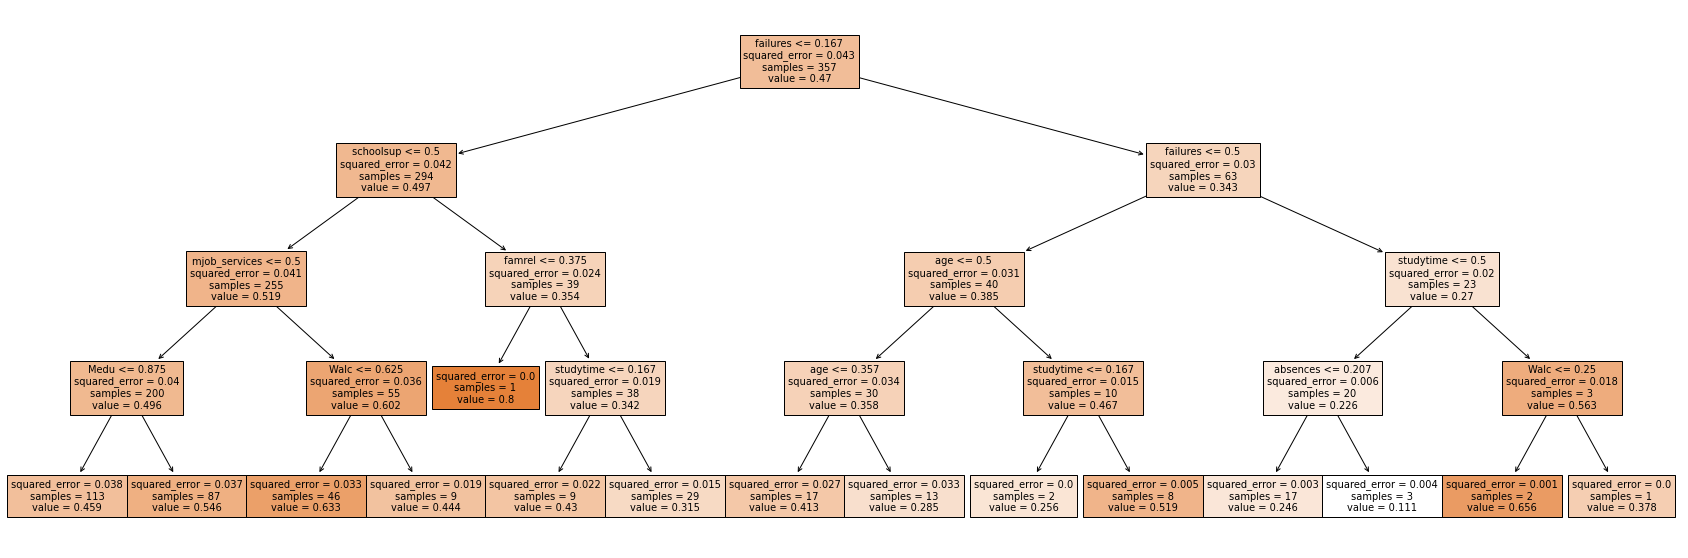

In [22]:
model = tree.DecisionTreeRegressor(max_depth=4).fit(X, y)
plt.figure(figsize=(30,10))
pltreenodes=tree.plot_tree(model, feature_names=features, filled=True)
plt.show()

# Decision Tree Classifier Model
The decision tree classifier works in a similar fashion to the regression tree, but instead of predicting a numeric output it predicts a simple boolean.

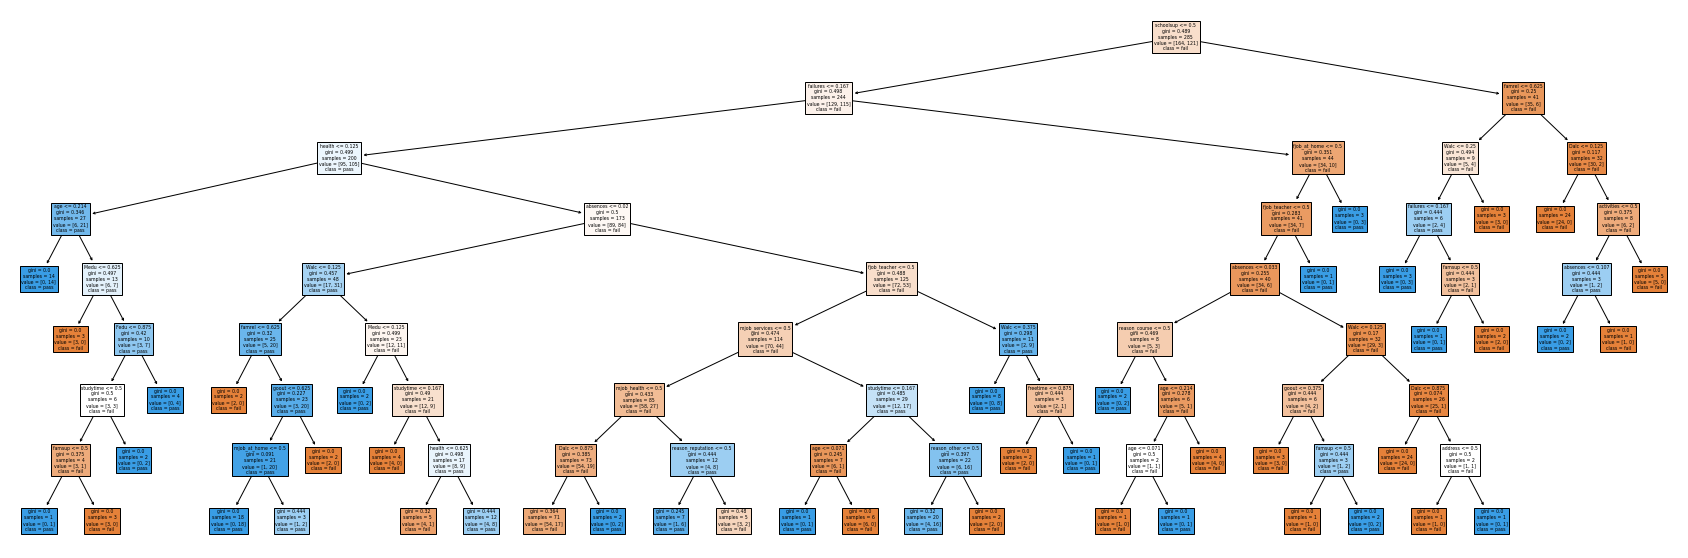

In [23]:
X,y,features = ImportandCleanData()
y=y>0.5 # Gmean, converted to a boolean
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_depth=8 # Initial guess based on the max_depth from the regression tree done above.
max_leaf_nodes=None
dtmodel = tree.DecisionTreeClassifier(max_depth=max_depth,max_leaf_nodes=max_leaf_nodes).fit(X_train, y_train)  

plt.figure(figsize=(30,10))
treenodes=tree.plot_tree(dtmodel, feature_names = features, class_names = ['fail','pass'], filled=True)
plt.show()

The tree above shows the decision tree generated with a max_depth = 8. The most striking feature of this tree is how jumbled up the blue and brown nodes are, showing again how no significant patterns exist in the data set between the features and the class Gmean fail/pass.

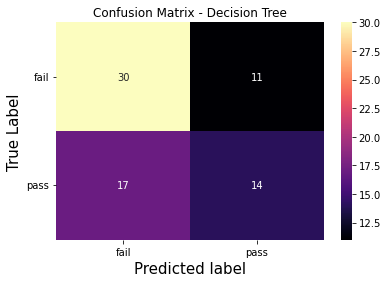

<Figure size 720x504 with 0 Axes>

In [24]:
y_pred = dtmodel.predict(X_test)

# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

#plot the confusion matrix
matrix_df = pd.DataFrame(confusion_matrix) #turn this into a dataframe
ax = plt.axes()
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['fail','pass'])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(['fail','pass'], rotation = 0)
plt.show()

In [25]:
print("Distribution of class values: \n",y.value_counts())
print("\nThis distribution is even and not skewed, so safe to use accuracy as a measure of model goodness\n")
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Distribution of class values: 
 False    205
True     152
Name: Gmean, dtype: int64

This distribution is even and not skewed, so safe to use accuracy as a measure of model goodness

Accuracy:  0.6111111111111112


SImilar to the stepwise refinement method used for the linear regression above, lets use the "feature importance" method to discover and use only the most importance features to create a simpler decision tree model.

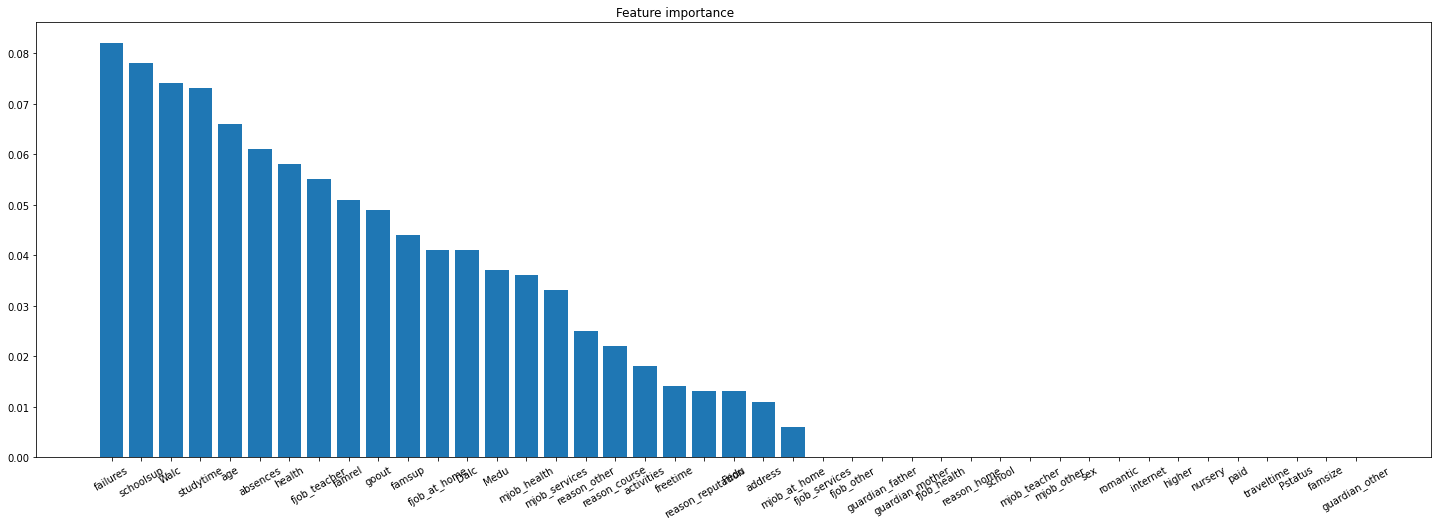

In [26]:
#extract importance
importance = pd.DataFrame({'feature': X_train.columns, 'importance' : np.round(dtmodel.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)

plt.figure(figsize = (25,8))
plt.bar(importance['feature'], importance['importance'])
plt.title("Feature importance", ha='right')
plt.xticks(rotation = 30)
plt.show()

Now, using only the top 10 most important features, lets try and find the optimal f1 model score using different values of max_depth and max_leaf_nodes.

In [27]:
tuned_parameters = [{'max_depth': [2,3,4,5,6,7,8], 'max_leaf_nodes': [6,8,10,12,14,16,18,20]}]
scores = ['f1']
data={}
for score in scores:
    
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    clf = GridSearchCV(
        DecisionTreeClassifier(), tuned_parameters,
        scoring = f'{score}_macro'
    )

    clf.fit(X_train[list(importance['feature'][:11])], y_train)  # only train with top 10 most important feature
    
    print("Best parameters set found on development set:", clf.best_params_)

    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        max_depth=params['max_depth']
        data[max_depth]=[]
        data[max_depth].append([])
        data[max_depth].append([])
        
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        #print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")
        data[params['max_depth']][0].append(params['max_leaf_nodes'])
        data[params['max_depth']][1].append(mean)
    


Tuning hyperparameters for f1

Best parameters set found on development set: {'max_depth': 6, 'max_leaf_nodes': 20}


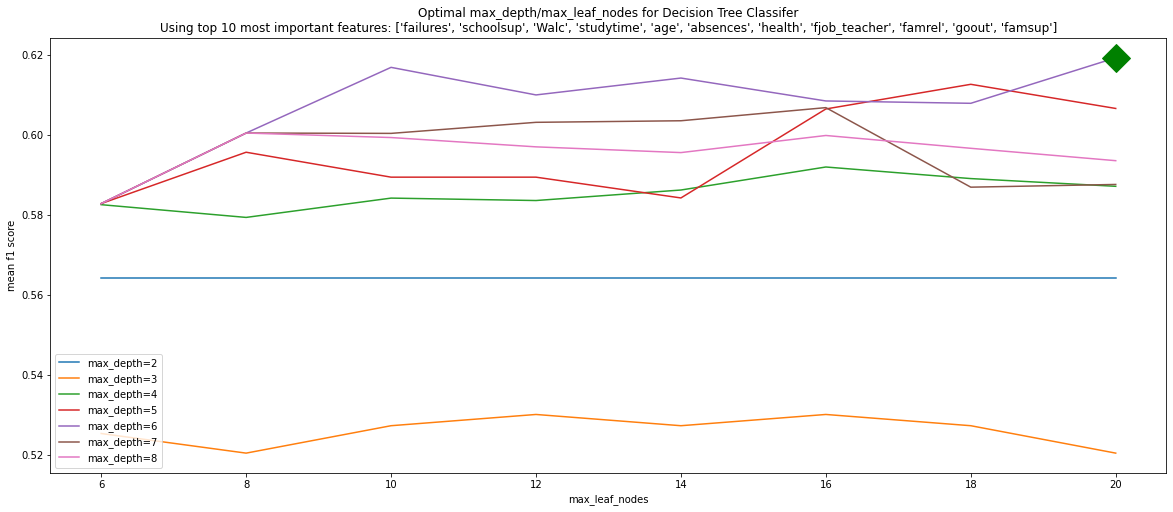

In [28]:
plt.figure(figsize = (20,8))
for i in range (2,9):
    plt.plot(data[i][0],data[i][1], label='max_depth='+str(i))
    plt.legend(loc="lower left")
    
max_depth=clf.best_params_['max_depth']
max_leaf_nodes=clf.best_params_['max_leaf_nodes']
index = data[max_depth][0].index(max_leaf_nodes)
mean= data[max_depth][1][index]
plt.plot(max_leaf_nodes,mean,'gD', markersize=20)
plt.title("Optimal max_depth/max_leaf_nodes for Decision Tree Classifer\nUsing top 10 most important features: " + str(list(importance['feature'][:11])))
plt.xlabel('max_leaf_nodes')
plt.ylabel("mean f1 score")
plt.show()

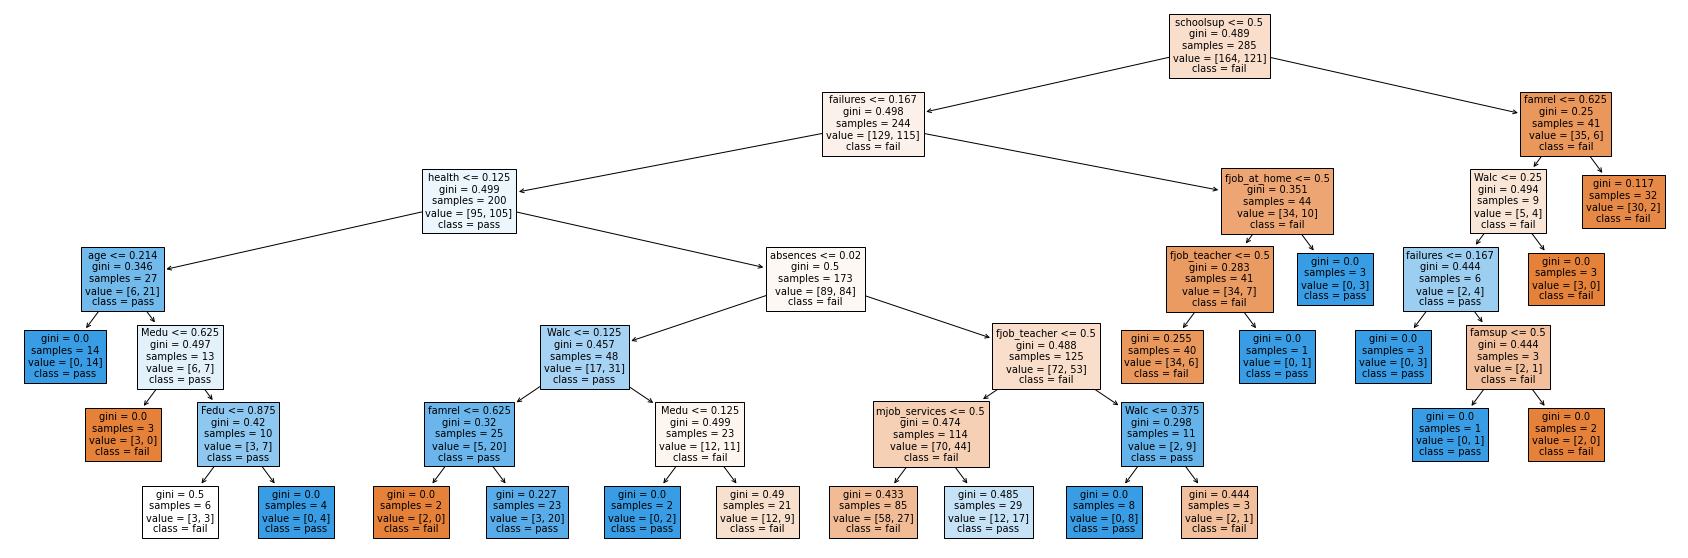

In [29]:
dtmodel = tree.DecisionTreeClassifier(max_depth=max_depth,max_leaf_nodes=max_leaf_nodes).fit(X_train, y_train)  
plt.figure(figsize=(30,10))
treenodes=tree.plot_tree(dtmodel, feature_names = features, class_names = ['fail','pass'], filled=True)
plt.show()

In [30]:
y_pred = dtmodel.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.5972222222222222


# Support Vector Machine (SVM) Classifier Model

Support Vector Machine, abbreviated as SVM,  can be used for both regression and classification tasks. The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space (N — the number of features) that distinctly classifies the data points.

The big difference between SVM and a Linear Regression Classifier is that SVM does not assume a linear hyperplane.

In [31]:
X,y,features = ImportandCleanData()
y=y>0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a SVM classifier using SVC class
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train, y_train)
 
# Model performance
y_pred = svm.predict(X_test)
print('Accuracy: ',accuracy_score(y_test, y_pred))

# Lets try that again with only the top 10 most important features as identified by the classification decision tree
svm.fit(X_train[list(importance['feature'][:11])], y_train)  # only train with top 10 most important feature
y_pred = svm.predict(X_test[list(importance['feature'][:11])])
print('Accuracy: ',accuracy_score(y_test, y_pred))

Accuracy:  0.6944444444444444
Accuracy:  0.5694444444444444


From the results above, an accuracy

# Neural Network Model

One of the easiest to implement Neural Network for classification from Scikit-Learn’s called the MLPClassifier, which stands for Multi-layer Perceptron classifier. Unlike the classification algorithms earlier in this assignment, the MLPClassifier relies on an underlying or internal Neural Network to perform the task of classification.

Although not part of the DTSA 5509 course, I have included this final model as a "last ditch effort" to try and get anything that had a reasonable accuracy.

In [32]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

X,y,features = ImportandCleanData()
y=y>0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing the MLPClassifier and fitting the training data to the network
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1).fit(X_train, y_train)

#Predicting y for X_val
y_pred = classifier.predict(X_test)

#Importing Confusion Matrix

#Comparing the predictions against the actual observations in y_val
cm = metrics.confusion_matrix(y_pred, y_test)
#print(cm)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", metrics.accuracy_score(y_pred, y_test))

Accuracy of MLPClassifier :  0.7222222222222222


# Discussion and Conclusion

This project used a variety of machine learning techniques to attempt to develop a model which could reasonably well relate student grades to a variety of student attributes.

Before modelling the data I first carefully checked the dataset for missing values, outliers, or unusual values. I then transformed all of the data to numerical values and scaled them to a 0-1 range. Finally I created a numerical class or target value as the mean of the 3 grades supplied.

I then checked if any features could be removed if they were highly correlated with one of more other features. For this, I inspected the correlation matrix, which I also converted to a grayscale heatmap to more easily visualise correlated pairs. The notable absence of almost no correlation between all of the features and the class Gmean was an early clue that modelling this dataset was going to be difficult, as there were no real underlying patterns in the data. Given that I had found this dataset on Kaggle, I even wondered if perhaps this dataset was not actually based on data collected in the real world, but simply dummy data! 

In any case, real or dummy, I decided to proceed with the analysis as the method and working will be the same no matter the outcome.
 
As a starting point, I derived a simple Linear Regression model using all of the features, and this produced an R-squared of just 0.16. This figure is so low that it means there is simply no linear relationship to be found between any of the features and the class Gmean. This is not particularly surprising, as the correlation matrix had already indicated this, and also in almost every real-world dataset it is very rare to find simple linear relationships.

To improve the Linear Regression, I used the forward stepwise refinement technique to sequentially find the features which yielded the largest R-squared. The curve of R-squared ve number of features had a maxima at 20, but because the top of this curve was relatively flat 13 features gave almost the same result of an R-squared of 0.38

I then identified and removed unusual or outlier rows using a leverage chart, but this gave no improvement to the R-squared result.

I then converted the class Gmean to a boolean (<0.5="fail",>=0.5="pass") and trained a Logistic Regression model. Because this model also used a linear hyperplane, as expected it performed poorly, and returned a low AUC result 0f 0.71 from the ROC curve. 

My conclusion at this point is that certainly there is no underlying linear relationships in the dataset.

I then trained a Decision Tree Regressor model (using the numeric Gmean) on 80% of the dataset and got an even worse result than with the Linear Regression! I tried 6 different values of tree max_depth, and ALL of them returned a negative R-squared using the 20% test dataset! This negative result means that the model performs worse than returning a constant value for any input! 

My explanation of why the Decision Tree Regressor model was so bad, is that the 80% training data is almost totally different to the 20% test data, as this dataset as a whole is highly uncorrelated. I was able to test and confirm this theory by retraining the Decision Tree Regressor model using 100% of the dataset, and sure enough I obtained a very respectable R-squared of over 0.9. However, this tree had nearly 300 nodes (there are only 360 rows), meaning that there was almost one node per row giving a hopelessly overfitted and next to useless model.

I then tried a Decision Tree Classifier Model (again converting the class Gmean to a boolean (<0.5="fail",>=0.5="pass") and experimented with different features (sorted by importance) and tuning the model to different values of max_depth and max_leaf_nodes. The model produced a rather jumbled tree with the pass/fail nodes being jumbled and mixed all around the tree, rather than forming any groups or patterns.

I then trained a Support Vector Classifier with an 80/20 train/test data split, and obtained a more respectable accuracy of nearly 70%. Given the relatively even class value split of pass/fail, this is a valid and interesting result.

Finally, given the clear non-linearity of the dataset, I trained a Neural Network model and obtained an accuracy of 72%

My conclusion from all of this is that this is a rubbish dataset from Kaggle that contains no real patterns of relationships that can be found through machine learning techniques. Looking back, there was a clue this might be the case as on Kaggle there were no notes or background information about this dataset: where, when, how it was collected.

However, as a closing thought, I feel I have learnt more struggling with this terrible dataset than if I had used something better.